# Домашнее задание 3.1. Визуализация данных в Python
# 🏃‍♂️🤸‍♂️🏋️‍♀️ 


Поздравляем, ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на 2021 год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

Не стесняйся оставлять свои комментарии и заметки с рекомендациями для руководителя относительно данных, которые видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

#сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь.**

Как это сделать:

1. Работать будем с датафремом `workouts`.
2. Сгруппируй данные по дням, найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси `X` 
    
    - подпись оси `Y` 
4. Удали неполные данные, которые мешают анализу.

**Предварительно, как, наверное, уже изучалось ранее, посмотрим на сами данные, которые мы имеем**: названия полей, какие значения содержатся в датафрейме. Это можно сделать несколькими способами, например:
- workouts.sample(3) - случайным образом 3 записи из датафрейма
- workouts.head(4) - 4 первых записи 
- workouts.tail(5) - 5 последних записей

In [3]:
workouts.head(2)

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642


Как видим, поле `start_at` хранит дату и время тренировки. Проверим тип хранимого значения:

In [4]:
workouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104693 entries, 0 to 104692
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   workout_id             104693 non-null  int64         
 1   cost                   100012 non-null  float64       
 2   start_at               104693 non-null  datetime64[ns]
 3   status                 104693 non-null  object        
 4   workout_schedule_type  104693 non-null  object        
 5   client_id              104693 non-null  int64         
 6   client_status          100362 non-null  object        
 7   workout_type           104693 non-null  object        
 8   trainer_department     104676 non-null  object        
 9   trainer_id             104693 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 8.0+ MB


Итак, тип данных `start_at` - `datetime64[ns]`.

В задании сказано, что необходимо сгруппировать тренировки по дням и подсчитать количество проведенных тренировок. Подсчет количества будем проводить по `workout_id` - так как оно гарантированно ненулевое по определению, а поле `start_at` предварительно преобразуем в периодичный тип данных с периодичностью "D" - день. 

Датафрейм обработаем последовательно связывая операции друг с другом:

In [5]:
trainings_by_day = workouts.copy().resample("1D", on='start_at').count().workout_id

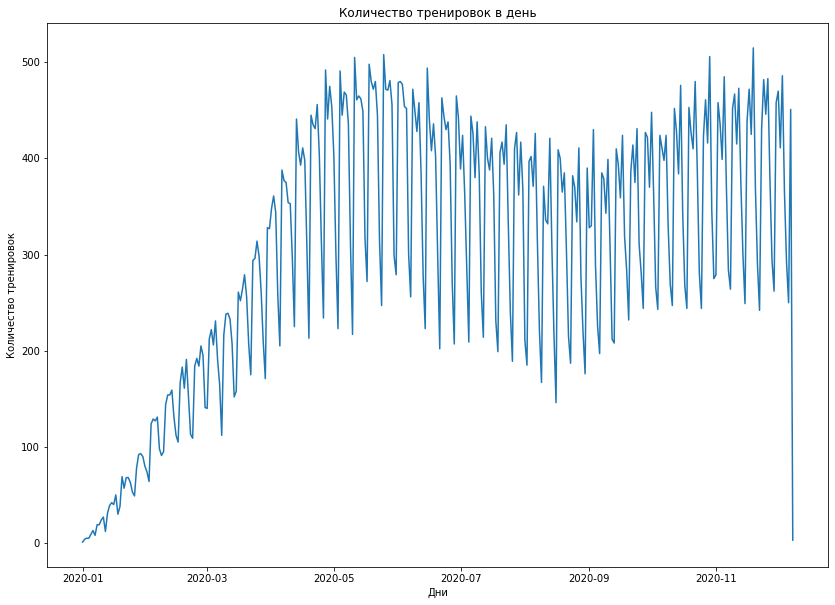

In [6]:
plt.figure(figsize=(14, 10))
plt.plot(trainings_by_day)
plt.title("Количество тренировок в день")
plt.xlabel("Дни")
plt.ylabel("Количество тренировок")

# отобразим на диаграмме участок с наиболее репрезентативной выборкой
# plt.xlim(pd.Period('2020-03-1'), pd.Period('2020-12-7'))
plt.show()

Из графика можно сделать предварительные выводы:
- начиная с середины марта количество тренировок в день не опускалось ниже 100
- внутри недели есть дни с очевидно бОльшим количеством тренировок за день, чем другие
- наибольший пик количества тренировок приходитcя на периоды май - июнь и ноябрь - декабрь

Соответственно, могут быть сформированы предварительные гипотезы:
- количество тренировок в день зависит от дня недели. Необходимо определить дни недели с минимальными значениями, найти факторы, влияющие на низкую посещаемость.
- в летне-осенний период (конец июля - конец октября) максимальное и минимальное количество тренировок в день сокращается, соответственно сокращаяется среднее количество тренировок в этот период (по сравнению с "высокими" весной и зимой)

Для демонстрации первой гипотезы изменим размерность, укрупнив диаграмму:

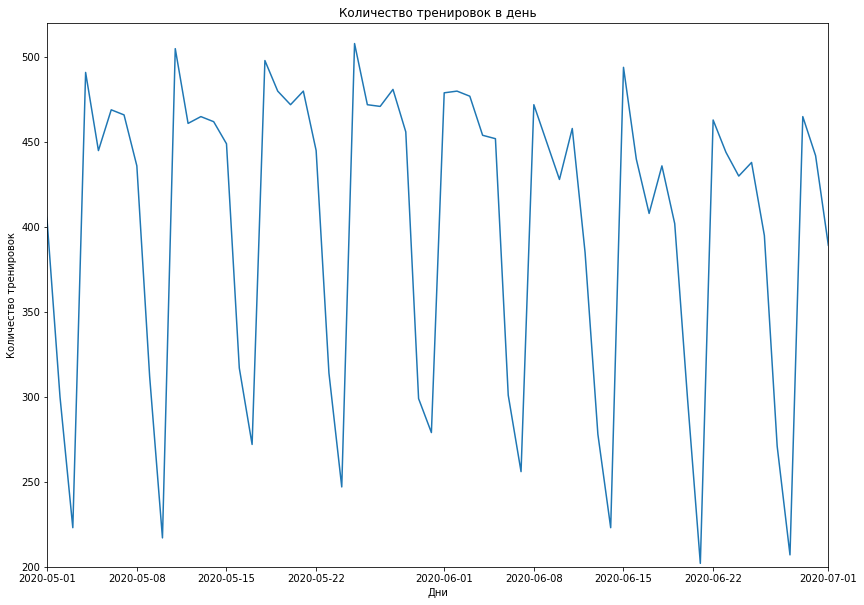

In [7]:
plt.figure(figsize=(14, 10))
plt.plot(trainings_by_day)
plt.title("Количество тренировок в день")
plt.xlabel("Дни")
plt.ylabel("Количество тренировок")
plt.ylim(200, 520)
plt.xlim(pd.Period('2020-05-1'), pd.Period('2020-07-1'))
plt.show()

## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом,  в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. 

**Построй гистограмму, которая покажет, как были распределены тренировки за ноябрь по тренерам, которые уже работали в нашей компании до 1 ноября и сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. В цикле для каждого департамента: 

    - отфильтруй по `trainer_department` тренировки нужного департамента
    - построй гистограмму распределения тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
        - задай 5 столбцов
        
 

*Весь код можно написать в одной ячейке.*

**Подготовим данные**


In [8]:
#выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

#множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [9]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [10]:
#кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем серию в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [11]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

<Figure size 576x432 with 0 Axes>

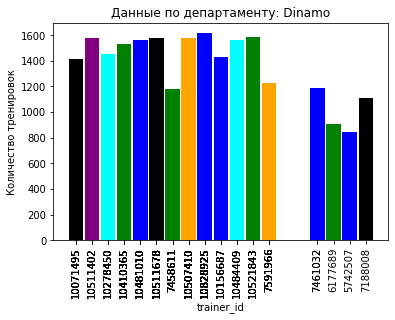

<Figure size 576x432 with 0 Axes>

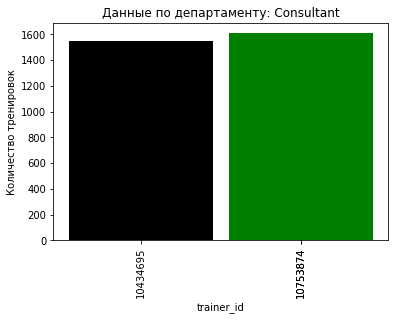

<Figure size 576x432 with 0 Axes>

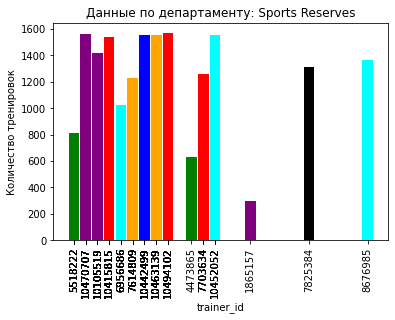

<Figure size 576x432 with 0 Axes>

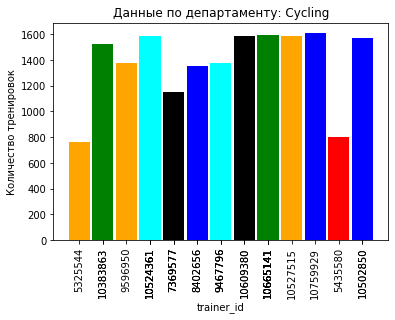

<Figure size 576x432 with 0 Axes>

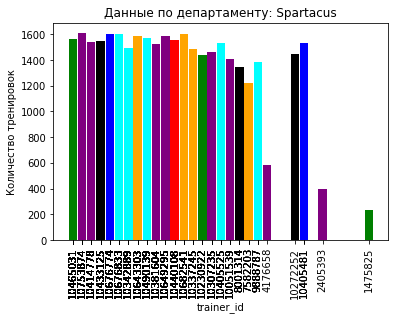

<Figure size 576x432 with 0 Axes>

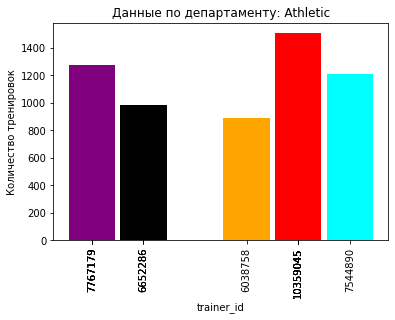

<Figure size 576x432 with 0 Axes>

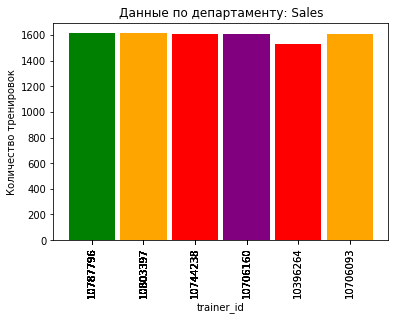

In [12]:
# напиши здесь код
for dep in departments:
    workouts_by_trainer_in_department = workouts_by_trainer.loc[lambda x: x.trainer_department==dep]
    plt.figure(figsize=(8, 6))
    fig, ax = plt.subplots()
    ax.bar(
        workouts_by_trainer_in_department.workouts, 
        workouts_by_trainer_in_department.index, 
        color=['black', 'red', 'green', 'blue', 'cyan', 'orange', 'purple'],
        width=0.9)
    
    ax.set_xticks(workouts_by_trainer_in_department.workouts)

    #  Устанавливаем подписи тиков
    ax.set_xticklabels(workouts_by_trainer_in_department.trainer_id)
    
    plt.title(f'Данные по департаменту: {dep}')
    plt.ylabel("Количество тренировок")
    plt.xlabel(workouts_by_trainer_in_department.trainer_id.name)
    
    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.xticks(rotation=90)
    
    plt.show()

Представленные выше диаграммы позволяют получить представление о загрузке тренеров в ноябре в различных департаментах.
Так:
- в департаментах Sales и Consultant примерно одинаковая загрузка тренеров;
- в департаментах Sports Reserves и Dinamo присутствуют тренера, загрузка которых выглядит значительно ниже остальных;
- в департаментах Spartacus и Cycling картина схожая с предыдущими двумя департментами, но количество тренеров с низкой загрузкой значительно ниже, возможно эти тренеры находились в отпуске в ноябре

Вместе с тем, представленные графики показывают дословно количество тренировок, проведенных каждым тренером за ноябрь. И только косвенно указывают на возможную перегрузку, так как не отражают нормальной загрузки одного тренера внутри департамента. Под нормальной я здесь понимаю ту нагрузки, которая большинством тренеров не считается "перегрузкой".

## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренировок по сравнению с остальными, и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В аргументы функции, которая строит boxplot, передай: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй свой цвет в графике
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график

<AxesSubplot:xlabel='workouts', ylabel='trainer_department'>

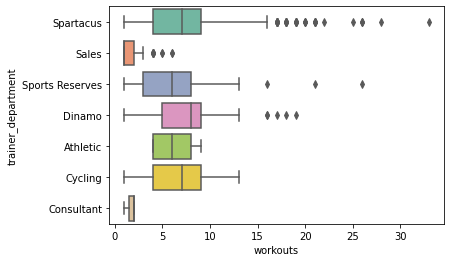

In [13]:
sns.boxplot(
    x='workouts', 
    y='trainer_department',
    data=workouts_by_trainer,
    palette="Set2"
)

Возможно, я не до конца понял задание. Из представленного графика видно, что повышенная (по сравнению с остальными департаментами) загрузка есть в департаменте Spartacus, так как правое плечо в этом департаменте наибольшее, но как это показать более наглядно, затрудняюсь ответить.

В департаменте Dinamo нагрузку тренеров можно повышать, так как левая часть коробки значительно левее медианного значения.

## Задание 4


Логично, что дешевые тренировки пропускаю чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании, оставь комментарий по каждому графику, видишь ли ты какие-то явные зависимости в даннных.**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [14]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


2. **Строим график распределения, который покажет корреляцию прогулов к цене**

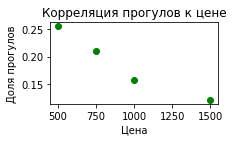

In [15]:
cost_data_agg = (
    workouts_users[['status','cost','age']]
    .loc[workouts_users.workout_schedule_type!='trial']
    .dropna()
    .copy()
    .assign(age = lambda x: x.age.apply(int))
    .assign(cost = lambda x: x.cost.apply(int))
    .assign(status = lambda x: x.status.map({'success':0,'failed_by_client':1}))
    .groupby('cost')['status'].mean().reset_index()
    .rename(
        columns={'status': 'failed_share_by_cost'}
    )
)
plt.figure(figsize=(3, 1.5))
plt.scatter(
    x=cost_data_agg.cost,
    y=cost_data_agg.failed_share_by_cost,
    c='green'
)
plt.title("Корреляция прогулов к цене")
plt.xlabel("Цена")
plt.ylabel("Доля прогулов")

plt.show()

Из представленного графика видно, что при увеличении цены доля прогулов также снижается

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике

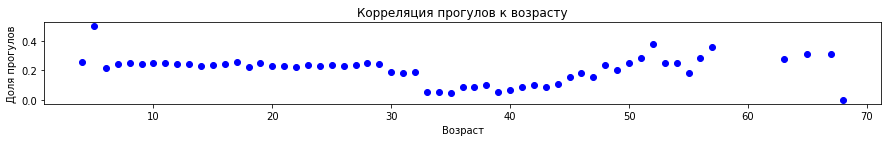

In [16]:
age_data_agg = (
    workouts_users[['status','cost','age']]
    .loc[workouts_users.workout_schedule_type!='trial']
    .dropna()
    .copy()
    .assign(age = lambda x: x.age.apply(int))
    .assign(cost = lambda x: x.cost.apply(int))
    .assign(status = lambda x: x.status.map({'success':0,'failed_by_client':1}))
    .groupby('age')['status'].mean().reset_index()
    .rename(
        columns={'status': 'failed_share_by_age'}
    )
)
plt.figure(figsize=(15, 1.5))
plt.scatter(
    x=age_data_agg.age,
    y=age_data_agg.failed_share_by_age,
    c='blue'
)
plt.title("Корреляция прогулов к возрасту")
plt.xlabel("Возраст")
plt.ylabel("Доля прогулов")

plt.show()

1. До возраста 33 лет доля прогулов не зависит от возраста и примерно одинакова.
2. Для возрастов 34 - 44 года характерна минимальная доля прогулов
3. Начиная с 44 лет наблюдается зависимость: чем выше возраст, тем больше доля прогулов

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту и к цене одновременно**
    - создай словарь цветов цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - аргумент  с - цвета для разных цен
          

**Видимо, я не до конца понял задания, поэтому привожу далее код того, как я понял:**

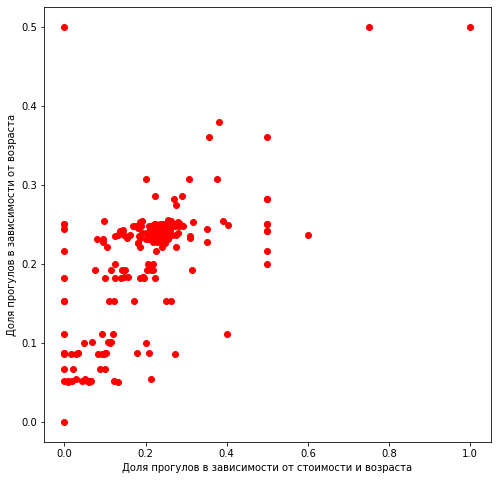

In [17]:
# Объединяем значения в один датафрейм, выравнивая тем самым оси
data_to_chart = (
    cost_age_data_agg.merge(
        age_data_agg,
        how='left',
        on='age'
    )
    .rename(
        columns={'status': 'failed_share_by_cost_and_age'}
    )
    .merge(
        cost_data_agg,
        how='left',
        on='cost'
    )
)

# Строим график
plt.figure(figsize=(8, 8))
plt.scatter(
    x=data_to_chart.failed_share_by_cost_and_age,
    y=data_to_chart.failed_share_by_age,
    c='red'
)
plt.title("")
plt.xlabel("Доля прогулов в зависимости от стоимости и возраста")
plt.ylabel("Доля прогулов в зависимости от возраста")

plt.show()

есть еще и третий вариант, но он тоже не сильно наглядный

In [20]:
set(data_to_chart.cost)

{500, 750, 1000, 1500}

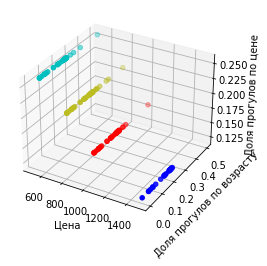

In [21]:
colors = {500:'c', 750:'tab:olive', 1000:'r', 1500:'b'}

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = data_to_chart.cost
y = data_to_chart.failed_share_by_age
z = data_to_chart.failed_share_by_cost

ax.scatter(x, y, z, c=data_to_chart.cost.map(colors))
ax.set_xlabel("Цена")
ax.set_ylabel("Доля прогулов по возрасту")
ax.set_zlabel("Доля прогулов по цене")

plt.show()

## Задание 5

**Сделай heatmаp для кейса из задания 5.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй хитмап. Используй любые аргументы, но обязательно вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике.

In [22]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [23]:
#кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573
5,500,41-45,0.191489
6,500,46-50,0.285714
7,500,50+,0.307692
8,750,0-20,0.249445
9,750,21-25,0.250124


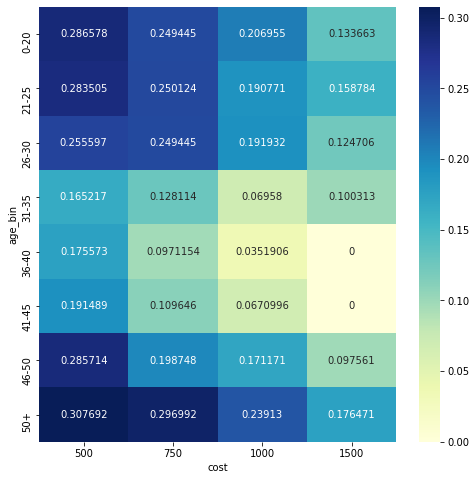

In [24]:
# напиши здесь код
pivot_data = cost_age_data_agg.pivot(
    index='age_bin',
    columns='cost',
    values='status'
)
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_data, 
            annot=True, 
            cmap="YlGnBu",
            fmt='g')
plt.show()

Тепловая карта - это источник большого количества информации о сводной таблице.
В частности, можно сделать следующие выводы:
- с ростом цены во всех когортах снижается доля прогулов, наибольшая доля прогулов характерна для когорты 50+ и цены до 750 рублей включительно;
- в когорте 36-40 самая низкая доля прогулов, когорты 31-35 и 41-45 - вторые в этой последовательности
- для когорт 36-40 и 41-45 с ростом цены доля прогулов к 1500 падает до 0
- для когорт 21-25 и 50+ характерно наименьшее снижение доли прогулов в зависимости от цены

## EXTRA

Если остались силы, есть дополнительное задание, делать его можно по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти ее самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалаи:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки week_day_num по workouts с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию со средним количеством тренировок в день.
5. Оставь комментарий, что ты видишь на графике. 

**Подготовим данные**

In [25]:
trainings_by_day # посмотрим, в каком формате лежат нужные данные

start_at
2020-01-01      1
2020-01-02      4
2020-01-03      5
2020-01-04      5
2020-01-05      9
             ... 
2020-12-04    365
2020-12-05    292
2020-12-06    250
2020-12-07    451
2020-12-08      3
Freq: D, Name: workout_id, Length: 343, dtype: int64

In [26]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбросим индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,2,Wednesday
1,2020-01-02,4,3,Thursday
2,2020-01-03,5,4,Friday
3,2020-01-04,5,5,Saturday
4,2020-01-05,9,6,Sunday
...,...,...,...,...
338,2020-12-04,365,4,Friday
339,2020-12-05,292,5,Saturday
340,2020-12-06,250,6,Sunday
341,2020-12-07,451,0,Monday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [27]:
trainings_by_day_frame['week_day_num'] += 1
trainings_by_day_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,3,Wednesday
1,2020-01-02,4,4,Thursday
2,2020-01-03,5,5,Friday
3,2020-01-04,5,6,Saturday
4,2020-01-05,9,7,Sunday
...,...,...,...,...
338,2020-12-04,365,5,Friday
339,2020-12-05,292,6,Saturday
340,2020-12-06,250,7,Sunday
341,2020-12-07,451,1,Monday


In [28]:
# напиши здесь код
avg_per_day = (
    trainings_by_day_frame
    .groupby(['week_day_num', 'week_day_name'])['workouts'].mean().reset_index()
    .rename(
        columns={'workouts': 'avg_per_day'}
    )
)
data_to_chart = (
    trainings_by_day_frame
    .groupby(['week_day_num', 'week_day_name'])['workouts'].sum().reset_index()
    .merge(
        avg_per_day[['avg_per_day', 'week_day_num']],
        on='week_day_num',
        how='left'
          )
)
data_to_chart

,week_day_num,week_day_name,workouts,avg_per_day
0,1,Monday,17953,366.387755
1,2,Tuesday,17134,349.673469
2,3,Wednesday,16310,332.857143
3,4,Thursday,17897,365.244898
4,5,Friday,14912,304.326531
5,6,Saturday,11170,227.959184
6,7,Sunday,9317,190.142857


Так как суммарное количество и количество среднее количество значительно различаются, построим bar chart двумя различными способами:

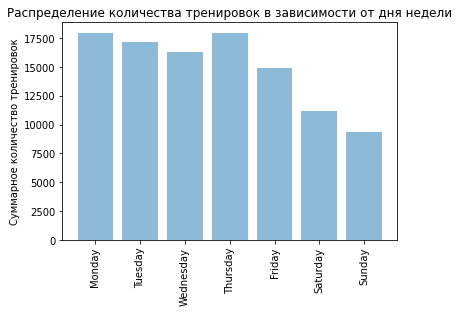

In [30]:
plt.bar(
    data_to_chart.week_day_num, 
    data_to_chart.workouts, 
    align='center', 
    alpha=0.5)
plt.xticks(data_to_chart.week_day_num, data_to_chart.week_day_name)
plt.ylabel('Суммарное количество тренировок')
plt.title('Распределение количества тренировок в зависимости от дня недели')
plt.xticks(rotation=90)
plt.show()

<Figure size 2880x2880 with 0 Axes>

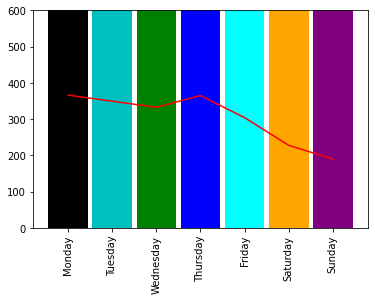

In [31]:
plt.figure(figsize=(40, 40))
fig, ax = plt.subplots()
ax.bar(
    data_to_chart.week_day_name, 
    data_to_chart.workouts, 
    color=['black', 'c', 'green', 'blue', 'cyan', 'orange', 'purple'],
    width=0.9)
data_to_chart['avg_per_day'].plot(color='r',ax=ax)
plt.ylim(0, 600)
plt.xticks(rotation=90)
plt.show()

Из графиков, представленных выше видно, что в понедельник и четверг наблюдается наибольшее количество тренировок, при этом линия среднего демонстрирует снижающийся тренд втечение недели.

А в совокупности с первыми графиками можно сделать вывод о том, что в начале года в понедельник было больше, чем в четверг (два пика еженедельно), к концу года картина изменилась - в четверг посещаемость выше, 

# 🎉🎉🎉 Поздравляем, ты великолепен! 